170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


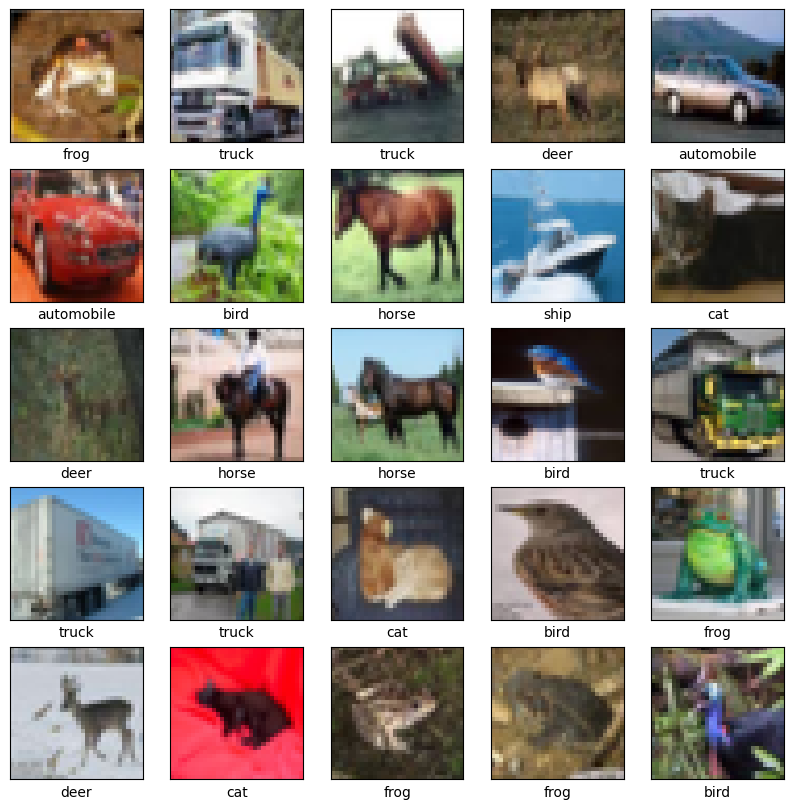

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 53ms/step - accuracy: 0.3423 - loss: 1.7766 - val_accuracy: 0.5143 - val_loss: 1.3532
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 134s 48ms/step - accuracy: 0.5647 - loss: 1.2253 - val_accuracy: 0.5960 - val_loss: 1.1405
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.6316 - loss: 1.0468 - val_accuracy: 0.6387 - val_loss: 1.0278
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 54ms/step - accuracy: 0.6649 - loss: 0.9577 - val_accuracy: 0.6565 - val_loss: 1.0025
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 134s 48ms/step - accuracy: 0.6892 - loss: 0.8846 - val_accuracy: 0.6753 - val_loss: 0.9434
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 47ms/step - accuracy: 0.7180 - loss: 0.8074 - val_accuracy: 0.6854 - val_loss: 0.9178
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.7360 - loss: 0.7572 - val_accuracy: 0.6894 - val_loss: 0.9214
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 47ms/step - accuracy: 0.7510

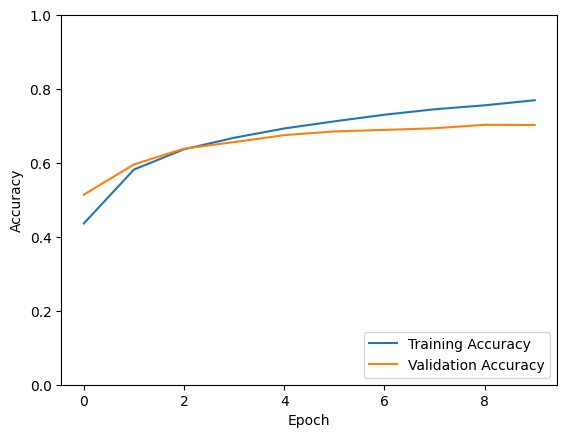

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


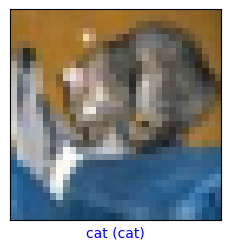

In [2]:
# Импортируем необходимые библиотеки
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Загрузка и предобработка данных CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Нормализация данных (преобразуем значения пикселей в диапазон от 0 до 1)
train_images, test_images = train_images / 255.0, test_images / 255.0

# Определение классов (меток) CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Визуализация нескольких примеров из тренировочного набора
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Построение модели CNN
model = models.Sequential([
    # Первый сверточный слой (Conv2D), далее слой подвыборки (MaxPooling2D)
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Второй сверточный слой
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Третий сверточный слой
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Преобразование (Flatten) и полносвязные слои (Dense)
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # Выходной слой с 10 классами
])

# Компиляция модели
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Тренировка модели
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Оценка модели на тестовых данных
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc}")

# Визуализация точности и потерь
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Пример предсказаний
predictions = model.predict(test_images)

# Функция для вывода предсказания на одном изображении
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = tf.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label[0]]})", color=color)

# Визуализация первого тестового изображения с предсказанием
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.show()
